In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# Directory containing the Excel files
directory = "../datas/excels"  # Please correct this path based on your actual directory structure

# Lists to store aggregated data
ages = []
genders = []
departments = []
points = []
image_data = []


# Function to process each Excel file
def process_excel_file(filepath):
    df = pd.read_excel(filepath)
    try:
        age = int(df[df.iloc[:, 0] == "Age"].iloc[0, 1])
        gender = df[df.iloc[:, 0] == "Gender"].iloc[0, 1]
        department = df[df.iloc[:, 0] == "Department"].iloc[0, 1]
        total_points = int(df[df.iloc[:, 0] == "Total Points"].iloc[0, 1])

        image_data_rows = df.iloc[8:41, :5]
        image_data_rows.columns = ["Image Name", "Given Answer", "Correct Answer", "Points", "Match"]
        image_data_rows["Age"] = age
        image_data_rows["Gender"] = gender
        image_data_rows["Department"] = department

        ages.append(age)
        genders.append(gender)
        departments.append(department)
        points.append(total_points)
        image_data.append(image_data_rows)

    except ValueError as e:
        print(f"Error processing file {filepath}: {e}")
        print(df.head())  # Print the first few rows for debugging


# Process all Excel files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
        filepath = os.path.join(directory, filename)
        process_excel_file(filepath)

# Create DataFrames for aggregated data
df_aggregated = pd.DataFrame({"Age": ages, "Gender": genders, "Department": departments})
df_users = pd.DataFrame({"Age": ages, "Gender": genders, "Department": departments, "Total Points": points})
df_images = pd.concat(image_data, ignore_index=True)

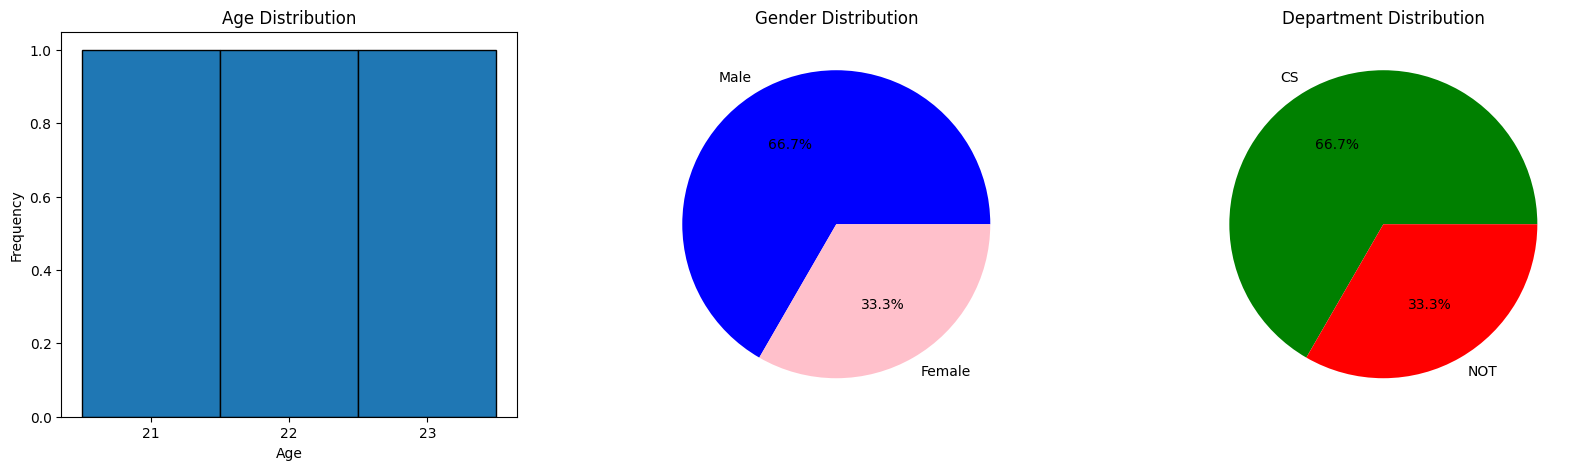

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

age_bins = np.arange(min(df_aggregated["Age"]) - 0.5, max(df_aggregated["Age"]) + 1.5, 1)  # Adjust the bin range and width
age_counts, _ = np.histogram(df_aggregated["Age"], bins=age_bins)

axes[0].bar(age_bins[:-1], age_counts, align="edge", width=1, edgecolor="black")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[0].set_xticks(age_bins[:-1] + 0.5)

# Gender distribution
gender_counts = df_aggregated["Gender"].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["blue", "pink"])
axes[1].set_title("Gender Distribution")

# Department distribution
department_counts = df_aggregated["Department"].value_counts()
axes[2].pie(department_counts, labels=department_counts.index, autopct="%1.1f%%", colors="green")
axes[2].set_title("Department Distribution")

plt.show()

In [4]:
print("User Data:")
print(df_users)
print("\nImage Data:")
print(df_images)

User Data:
   Age  Gender Department  Total Points
0   21  Female        NOT             2
1   22    Male         CS            17
2   23    Male         CS            12

Image Data:
              Image Name      Given Answer Correct Answer Points Match  Age  \
0        ai-no-loss4.png         Likely AI             AI      1   Yes   21   
1   ai-photo-reward5.png         Likely AI             AI      1   Yes   21   
2   ai-photo-reward6.png         Likely AI             AI      1   Yes   21   
3        ai-no-loss3.png      Likely Human             AI     -1    No   21   
4      r-photo-loss1.png      Likely Human          Human      1   Yes   21   
..                   ...               ...            ...    ...   ...  ...   
91  ai-photo-reward2.png         Likely AI             AI      1   Yes   23   
92        r-no-loss2.png  Definitely Human          Human      2   Yes   23   
93        r-no-loss1.png         Likely AI          Human     -1    No   23   
94                   NaN  

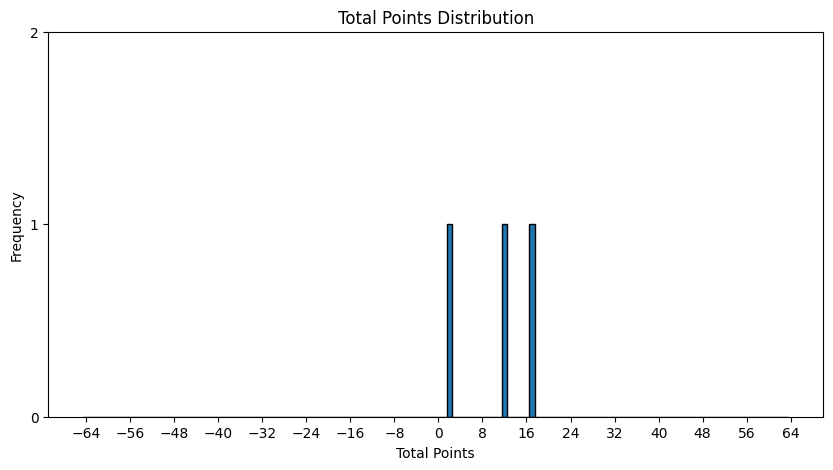

In [5]:
# Create bins with edges that ensure the bars are centered around their values
bins = [i - 0.5 for i in range(-64, 65)]

plt.figure(figsize=(10, 5))
plt.hist(df_users["Total Points"], bins=bins, edgecolor="black", align="mid")
plt.title("Total Points Distribution")
plt.xlabel("Total Points")
plt.ylabel("Frequency")
plt.xticks(range(-64, 65, 8))  # Set x-ticks to match the center of each bin

# Adjust y-ticks
plt.yticks(range(0, int(df_users["Total Points"].value_counts().max()) + 2))

plt.show()

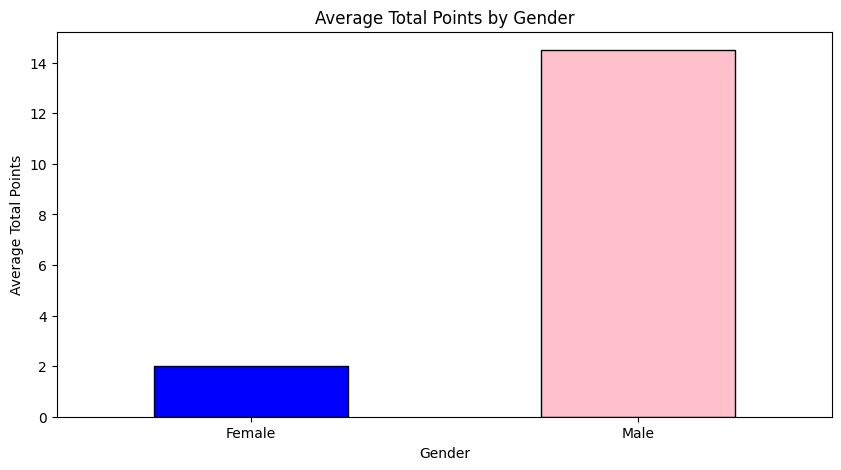

In [25]:
plt.figure(figsize=(10, 5))
df_users.groupby("Gender")["Total Points"].mean().plot(kind="bar", color=["blue", "pink"], edgecolor="black")
plt.title("Average Total Points by Gender")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Average Total Points")
plt.show()

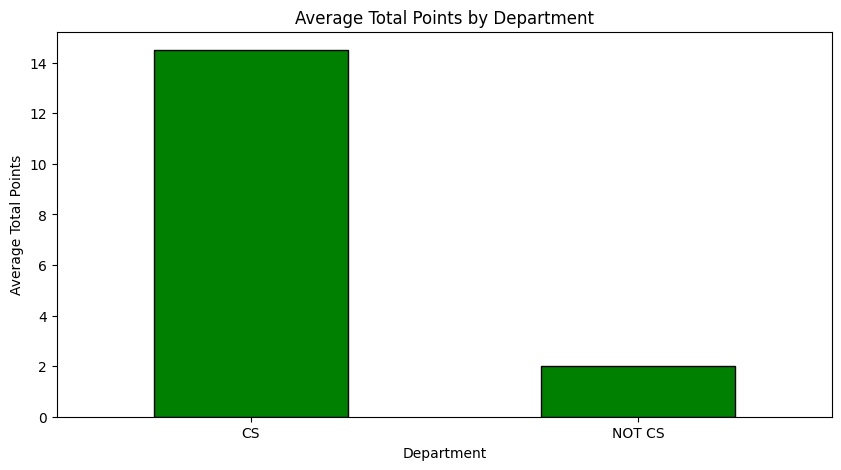

In [24]:
plt.figure(figsize=(10, 5))
df_users.groupby("Department")["Total Points"].mean().plot(kind="bar", color="green", edgecolor="black")
plt.title("Average Total Points by Department")
plt.xlabel("Department")
new_xticks = ["CS", "NOT CS"]
plt.xticks(range(len(new_xticks)), new_xticks, rotation=0)
plt.ylabel("Average Total Points")
plt.show()

<Figure size 1000x500 with 0 Axes>

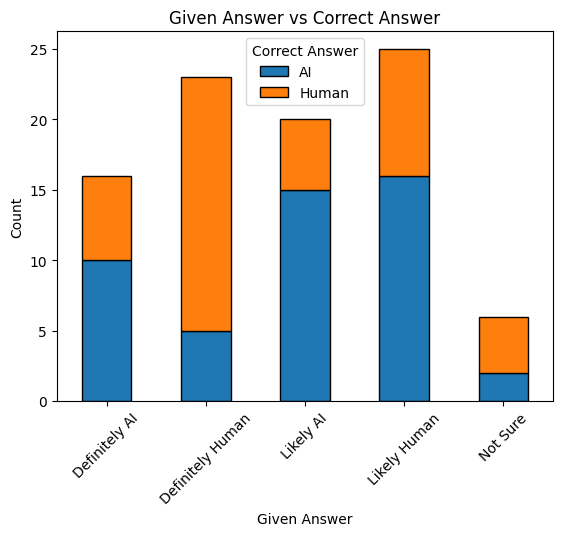

In [23]:
plt.figure(figsize=(10, 5))
df_images.groupby(["Given Answer", "Correct Answer"]).size().unstack().plot(kind="bar", stacked=True, edgecolor="black")
plt.title("Given Answer vs Correct Answer")
plt.xlabel("Given Answer")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

<Figure size 1000x500 with 0 Axes>

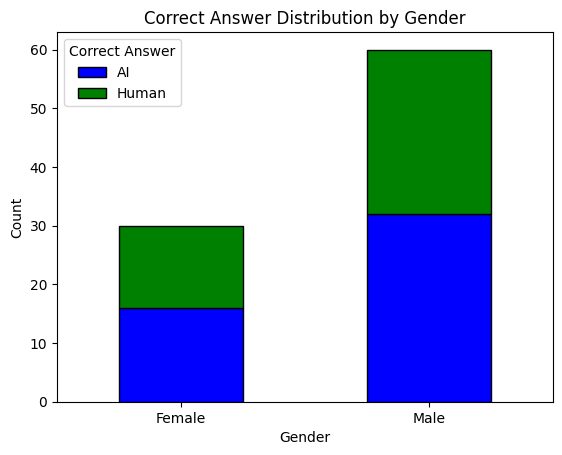

In [17]:
plt.figure(figsize=(10, 5))
df_images.groupby(["Gender", "Correct Answer"]).size().unstack().plot(kind="bar", stacked=True, color=["blue", "green"], edgecolor="black")
plt.title("Correct Answer Distribution by Gender")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

<Figure size 1000x500 with 0 Axes>

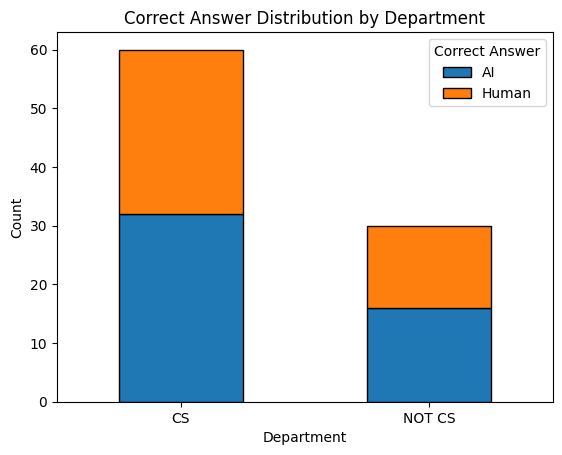

In [16]:
plt.figure(figsize=(10, 5))
df_images.groupby(["Department", "Correct Answer"]).size().unstack().plot(kind="bar", stacked=True, edgecolor="black")
plt.title("Correct Answer Distribution by Department")
plt.xlabel("Department")
new_xticks = ["CS", "NOT CS"]
plt.xticks(range(len(new_xticks)), new_xticks, rotation=0)
plt.ylabel("Count")
plt.show()

In [11]:
# Directory containing the Excel files
directory_path = "../datas/excels/"

# Load all Excel files from the specified directory
all_data = []
for filename in os.listdir(directory_path):
    if filename.endswith(".xlsx") and not filename.startswith("~$"):
        file_path = os.path.join(directory_path, filename)

        # Load the metadata from the initial rows
        metadata = pd.read_excel(file_path, nrows=3)

        # Extract gender and department from metadata
        gender = metadata.iloc[1, 1]
        department = metadata.iloc[2, 1]

        # Load the data again, skipping the initial metadata rows
        data = pd.read_excel(file_path, skiprows=4)

        # Rename columns for easier access
        data.columns = ["Image Name", "Given Answer", "Correct Answer", "Points", "Match"]

        # Add the extracted metadata to the main dataframe
        data["Gender"] = gender
        data["Department"] = department

        all_data.append(data)

# Concatenate all the data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)


# Define a function to calculate the statistics for each image
def calculate_statistics_corrected(df):
    results = []

    for image_name in df["Image Name"].unique():
        if pd.isna(image_name) or image_name == "Image Name" or image_name == "Total Points":
            continue

        image_data = df[df["Image Name"] == image_name]
        total_responses = len(image_data)
        correct_responses = image_data["Match"].value_counts().get("Yes", 0)

        female_correct = len(image_data[(image_data["Gender"] == "Female") & (image_data["Match"] == "Yes")])
        male_correct = len(image_data[(image_data["Gender"] == "Male") & (image_data["Match"] == "Yes")])
        cs_correct = len(image_data[(image_data["Department"] == "CS") & (image_data["Match"] == "Yes")])
        not_cs_correct = len(image_data[(image_data["Department"] != "CS") & (image_data["Match"] == "Yes")])

        female_correct_ratio = female_correct / total_responses if total_responses else 0
        male_correct_ratio = male_correct / total_responses if total_responses else 0
        cs_correct_ratio = cs_correct / total_responses if total_responses else 0
        not_cs_correct_ratio = not_cs_correct / total_responses if total_responses else 0

        results.append(
            {
                "Image Name": image_name,
                "Female Correct Ratio": f"{female_correct_ratio * 100:.2f}%",
                "Male Correct Ratio": f"{male_correct_ratio * 100:.2f}%",
                "CS Correct Ratio": f"{cs_correct_ratio * 100:.2f}%",
                "Not CS Correct Ratio": f"{not_cs_correct_ratio * 100:.2f}%",
            }
        )

    return pd.DataFrame(results)


# Calculate the statistics
corrected_statistics = calculate_statistics_corrected(combined_data)

# Sort the dataframe by the "Image Name" column
corrected_statistics = corrected_statistics.sort_values(by="Image Name")

# Save the dataframe to a new Excel file
output_file_path = "image_statistics.xlsx"
corrected_statistics.to_excel(output_file_path, index=False)

print(f"Statistics saved to {output_file_path}")

Statistics saved to image_statistics.xlsx
